<a href="https://colab.research.google.com/github/onej23/eajay.github.io/blob/main/Instacart_Market_Basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd  # 数据分析

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# aisles_down = drive.CreateFile({'id':'1zoUkwHvbD739CzPlLTPxNy6AhMbZdTZS'})
# department_down = drive.CreateFile({'id':'1cC8-_wITvZxni60u7w9XE8Vnk-CwBFbj'})
# order_products_prior_down = drive.CreateFile({'id':'1t_SpqOZtAIuFbmY4Mx2SgtxEkFp0ySvc'})
# order_products__train_down = drive.CreateFile({'id':'17MXakf2aj9I6etKWbRkTyb5wsO0iYeXU'})
# orders_down = drive.CreateFile({'id':'1545TdxoKNCswoadlYxQXh3cxwsU3rPS9'})
# products_down = drive.CreateFile({'id':'1ByLU4WoCFlRv2u0BLvEaquOFAOO05dn-'})
# sample_submission_down = drive.CreateFile({'id':'1ZRvMujp2_4W669C17MGJW3wr5QbSuLHV'})

# aisles_down.GetContentFile('aisles.csv')
# department_down.GetContentFile('department.csv')
# order_products_prior_down.GetContentFile('order_products__prior.csv')
# order_products__train_down.GetContentFile('order_products__train.csv')
# orders_down.GetContentFile('orders.csv')
# products_down.GetContentFile('products.csv')
# sample_submission_down.GetContentFile('sample_submission.csv')

aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('department.csv')
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__train = pd.read_csv('order_products__train.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
aisles.shape
aisles.head()
aisles.nunique()  #nuinque()这个函数分别统计每一列属性各自有多少个不同值。

aisle_id    134
aisle       134
dtype: int64

In [ ]:
departments.shape
departments.head()
departments.nunique()

department_id    21
department       21
dtype: int64

In [ ]:
products.shape
products.head()
products.nunique()

product_id       49688
product_name     49688
aisle_id           134
department_id       21
dtype: int64

In [ ]:
orders.shape
orders.head()
orders.nunique() 

order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [ ]:
orders.loc[orders.days_since_prior_order.isnull()].head() #days_since_prior_order 是null的找出来

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
11,2168274,2,prior,1,2,11,NaN
26,1374495,3,prior,1,1,14,NaN
39,3343014,4,prior,1,6,11,NaN
45,2717275,5,prior,1,3,12,NaN


In [ ]:
print(orders.eval_set.value_counts())
print('--------------------------------------')
print(orders.user_id.value_counts()) #查看用户id定了多少次货物
print('--------------------------------------')
print(orders.order_dow.value_counts())  #应该是一周七天， 订单所属的星期1-7的某一天
print('--------------------------------------') 
print(orders.order_hour_of_day.value_counts()) # 一天24小时，下订单的时间


prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64
--------------------------------------
152340    100
185641    100
185524    100
81678     100
70922     100
         ... 
13046       4
70208       4
111440      4
31762       4
47980       4
Name: user_id, Length: 206209, dtype: int64
--------------------------------------
0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64
--------------------------------------
10    288418
11    284728
15    283639
14    283042
13    277999
12    272841
16    272553
9     257812
17    228795
18    182912
8     178201
19    140569
20    104292
7      91868
21     78109
22     61468
23     40043
6      30529
0      22758
1      12398
5       9569
2       7539
4       5527
3       5474
Name: order_hour_of_day, dtype: int64


In [ ]:
print('There are %d samples with order_number=1'%np.sum(orders['order_number']==1))

There are 206209 samples with order_number=1


In [ ]:
orders[['order_dow','order_hour_of_day']].describe()

,order_dow,order_hour_of_day
count,3.421083e+06,3.421083e+06
mean,2.776219e+00,1.345202e+01
std,2.046829e+00,4.226088e+00
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+01
50%,3.000000e+00,1.300000e+01
75%,5.000000e+00,1.600000e+01
max,6.000000e+00,2.300000e+01


In [ ]:
# 查看用户购买总次数情况，即用户的记录
# 结论：一个用户最多记录为100，最少为4
print(orders['user_id'].value_counts())
print('--------------------------------------')
print(orders['user_id'].value_counts()[:5])
print('--------------------------------------')
print(orders['user_id'].value_counts()[-5:])

152340    100
185641    100
185524    100
81678     100
70922     100
         ... 
13046       4
70208       4
111440      4
31762       4
47980       4
Name: user_id, Length: 206209, dtype: int64
--------------------------------------
152340    100
185641    100
185524    100
81678     100
70922     100
Name: user_id, dtype: int64
--------------------------------------
13046     4
70208     4
111440    4
31762     4
47980     4
Name: user_id, dtype: int64


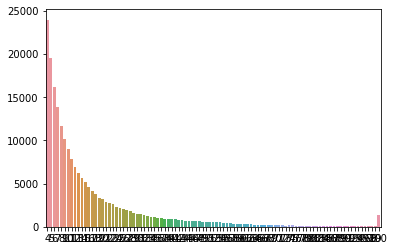

In [ ]:
# 绘制用户购买总次数的分布图，横轴为用户购买总次数，纵轴为购买人数
tmp=pd.DataFrame(orders['user_id'].value_counts().values,columns=['user_correspoding_samples'])
tmp=tmp['user_correspoding_samples'].value_counts()
sns.barplot(x=tmp.index,y=tmp.values)


In [ ]:
# 查看历史数据集，训练数据和测试数据之间用户的交叉情况，因为用户在推荐问题中都是一个很重要的特征变量
# 结论：train中所有用户均在prior中出现，test中所有用户均在prior中出现，但是train和test无相交用户情况
# 因此可知用户id在模型预测时，可能并不能带来增益，可以考虑删除
# Python len() 方法返回对象（字符、列表、元组等）长度或项目个数。
# set() 函数创建一个无序不重复元素集，可进行关系测试，删除重复数据，还可以计算交集、差集、并集等。
print(len(set(orders.loc[orders['eval_set']=='prior','user_id'])-set(orders.loc[orders['eval_set']=='train','user_id'])))
print(len(set(orders.loc[orders['eval_set']=='test','user_id'])-set(orders.loc[orders['eval_set']=='prior','user_id'])))
print(len(set(orders.loc[orders['eval_set']=='test','user_id'])-set(orders.loc[orders['eval_set']=='train','user_id'])))


75000
0
75000


In [ ]:
# 查看order_number和数据类别分布的关系
# 先增加一列数据为按照用户id分组的订单顺序的最大值
# 结论：查看订单顺序不是最大值的类别，结果均在历史数据中
#       查看订单顺序为最大值的类别，结果为训练数据或测试数据
# 由此可知由于order_number订单顺序存在时序关系，训练集和测试集中的数据是最新数据，且不存在交集，因此任务为预测未来用户会购买的产品情况
#新增一列为按照用户id分组的订单顺序的最大值

orders['order_number_max']=orders.groupby('user_id')['order_number'].transform('max').values
print(orders.order_number!=orders.order_number_max)
print('-------------------------------')
print(orders.loc[orders.order_number!=orders.order_number_max,'eval_set'].value_counts())
print('-------------------------------')
print(orders.loc[orders.order_number==orders.order_number_max,'eval_set'].value_counts())


0           True
1           True
2           True
3           True
4           True
           ...  
3421078     True
3421079     True
3421080     True
3421081     True
3421082    False
Length: 3421083, dtype: bool
-------------------------------
prior    3214874
Name: eval_set, dtype: int64
-------------------------------
train    131209
test      75000
Name: eval_set, dtype: int64


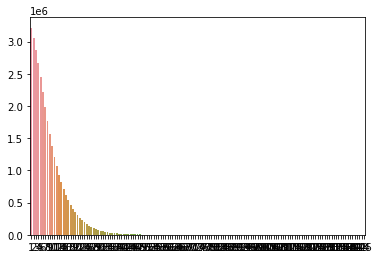

In [ ]:
'''
5.order_products__prior数据集分析
order_products__prior数据集大小为32434489*4，代表用户购买产品情况
一个订单id含有多个产品id，符合购物习惯
训练集中的产品id均在产品数据集中，无异常值
recorded的均值为0.58967.也就是说大概58%的产品都有记录
添加到购物篮的顺序由1-145，顺序越大，产品数量越少
'''
order_products__prior.shape
order_products__prior.head()
order_products__prior.nunique()

# 结论：历史数据集中出现的产品id均在产品数据集中出现，无异常值
set(order_products__prior['product_id'].values) - set(products['product_id'].values)

# 计算recordered的均值
# 结论：大概58%的数据是之前购买过，有记录的
order_products__prior['reordered'].mean() 

# 添加到购物篮的顺序
# 结论：1-145依次递减，符合实际情况，添加到购物篮的顺序越大，产品越少
order_products__prior['add_to_cart_order'].value_counts()

# 绘制柱状图
tmp = pd.DataFrame(order_products__prior['add_to_cart_order'].value_counts().sort_index())
sns.barplot(x =  tmp.index.values, y =tmp.values[:,0])


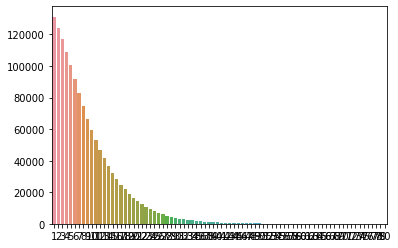

In [ ]:
'''
6.order_products__train.csv
order_products__train数据集大小为1384617*4
recordered记录的均值为0.598，也就是大概有40%的产品无记录
所有的product_id出现在产品数据集中，无异常值
添加到购物篮的顺序从1-80，符合实际情况，无异常值
'''
order_products__train.head()
order_products__train.shape
order_products__train.nunique()
# 结论：大概40%的产品无记录
order_products__train['reordered'].mean()

# 结论：训练数据集中出现的产品id均在产品数据集中出现，无异常值
set(order_products__train['product_id'].values)-set(products['product_id'].values)

# 结论：添加到购物篮的顺序1-80
tmp=pd.DataFrame(order_products__train['add_to_cart_order'].value_counts().sort_index())
sns.barplot(x=tmp.index.values,y=tmp.values[:,0])


In [ ]:
# 3.数据建模&Baseline
import gc
del orders['order_number_max']
gc.collect()#释放内存

# 将orders数据集根据eval_set类别分为历史数据集、训练集、测试集
orders_prior_data=orders.loc[orders.eval_set=='prior']
orders_train_data=orders.loc[orders.eval_set=='train']
orders_test_data=orders.loc[orders.eval_set=='test']

# 将订单详情和orders数据集合并
priors=order_products__prior.merge(orders_prior_data,on=['order_id'],how='left')
trains = order_products__train.merge(orders_train_data, on =['order_id'], how='left')
print('priors:',priors.head())
print('---------------------------------')
# 将prior数据集中的user_id和product_id作为总的候选集
user_product=priors[['user_id','product_id']].copy()
#新增一列为user_x_product 在这里崩溃的
user_product['user_x_product']=user_product['user_id'].astype('str')+'_'+user_product['product_id'].astype('str')

print('user_product:',user_product.head())
print('---------------------------------')
# 将trains数据集的用户id_产品id提取出来
train_user_X_product=trains['user_id'].astype('str')+'_'+trains['product_id'].astype('str')

# 去除候选集中的重复的用户名和产品id,重复证明用户重复购买产品
user_product=user_product.drop_duplicates(subset='user_x_product',keep='last')
user_product.head()
print('user_product:',user_product.head())
print('---------------------------------')

priors:    order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         2       33120                  1          1   202279    prior   
1         2       28985                  2          1   202279    prior   
2         2        9327                  3          0   202279    prior   
3         2       45918                  4          1   202279    prior   
4         2       30035                  5          0   202279    prior   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  
0             3          5                  9                     8.0  
1             3          5                  9                     8.0  
2             3          5                  9                     8.0  
3             3          5                  9                     8.0  
4             3          5                  9                     8.0  
---------------------------------
user_product:    user_id  product_id user_x_product
0   202279       33120 

In [ ]:
# 3.3构建训练集
test_user=orders_test_data['user_id']
train_user=orders_train_data['user_id']
# user_product中新增一列label为
user_product['label']=0
# 将历史数据集中的用户在最新训练数据中出现的用户挑选出来,作为训练数据集
train_data=user_product.loc[user_product.user_id.isin(train_user)]
# 将训练集中的用户id_产品id在最新训练数据中出现的标签设为1.证明该产品为复购产品
train_data.loc[train_data.user_x_product.isin(train_user_X_product),'label']=1
# 将数据集与订单数据合并构建训练数据集
train_data=train_data.merge(orders_train_data,on='user_id',how='left')
train_data.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,user_id,product_id,user_x_product,label,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,202279,9327,202279_9327,0,1050357,train,9,1,14,30.0
1,156122,47209,156122_47209,0,1277092,train,53,1,11,5.0
2,156122,46522,156122_46522,0,1277092,train,53,1,11,5.0
3,156122,38693,156122_38693,0,1277092,train,53,1,11,5.0
4,156122,48825,156122_48825,0,1277092,train,53,1,11,5.0


In [ ]:
# 3.5构建测试集
test_data=user_product.loc[user_product.user_id.isin(test_user)]
test_data=test_data.merge(orders_test_data,on='user_id',how='left')

# 删除新增的无用的列，并释放内存
del test_data['user_x_product']
del train_data['user_x_product']
gc.collect()
test_data.head()

,user_id,product_id,label,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,45082,17330,0,65432,test,11,4,12,15.0
1,45082,27407,0,65432,test,11,4,12,15.0
2,45082,35419,0,65432,test,11,4,12,15.0
3,45082,196,0,65432,test,11,4,12,15.0
4,45082,44635,0,65432,test,11,4,12,15.0


In [ ]:
# 3.6所有数据集进行拼接
train_data =  train_data.merge(products, on='product_id', how= 'left')
test_data  =  test_data.merge(products, on='product_id', how= 'left')
train_data.head()
# test_data.head()


,user_id,product_id,label,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,202279,9327,0,1050357,train,9,1,14,30.0,Garlic Powder,104,13
1,156122,47209,0,1277092,train,53,1,11,5.0,Organic Hass Avocado,24,4
2,156122,46522,0,1277092,train,53,1,11,5.0,Spaghetti Pasta,131,9
3,156122,38693,0,1277092,train,53,1,11,5.0,Meyer Lemon,24,4
4,156122,48825,0,1277092,train,53,1,11,5.0,Bag of Organic Lemons,24,4


In [ ]:
test_data.head()

,user_id,product_id,label,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,45082,17330,0,65432,test,11,4,12,15.0,Light,27,5
1,45082,27407,0,65432,test,11,4,12,15.0,Chunky Salsa Medium,51,13
2,45082,35419,0,65432,test,11,4,12,15.0,"Handmade Vodka From Austin, Texas",124,5
3,45082,196,0,65432,test,11,4,12,15.0,Soda,77,7
4,45082,44635,0,65432,test,11,4,12,15.0,Salsa Con Queso Medium Dip,51,13


In [ ]:
# 简易特征分析 其实感觉作者没有做特么详细的数据分析，就是大概看了下数据内容，然后挑选出了几个特征而已
feature_cols = ['order_number','order_dow','order_hour_of_day','days_since_prior_order','product_id','aisle_id','department_id']
label_cols = 'label'

# 验证集构建
def validation_sample(order_ids, frac = 0.2):
    import random
    sample_number = int(frac * len(order_ids))
    sample_val_order = random.sample( order_ids , sample_number) #随机抽取sample_number个函数
    sample_train_order = list(set(order_ids) - set(sample_val_order))
    return sample_train_order,sample_val_order
sample_train_order,sample_val_order = validation_sample(list(train_data['order_id'].unique()))
train = train_data.loc[train_data.order_id.isin(sample_train_order)]  #意思是从训练集挑出来了一些做为验证集
val   = train_data.loc[train_data.order_id.isin(sample_val_order)]
train.head()

,user_id,product_id,label,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,202279,9327,0,1050357,train,9,1,14,30.0,Garlic Powder,104,13
1,156122,47209,0,1277092,train,53,1,11,5.0,Organic Hass Avocado,24,4
2,156122,46522,0,1277092,train,53,1,11,5.0,Spaghetti Pasta,131,9
3,156122,38693,0,1277092,train,53,1,11,5.0,Meyer Lemon,24,4
4,156122,48825,0,1277092,train,53,1,11,5.0,Bag of Organic Lemons,24,4


In [ ]:
val.head()

,user_id,product_id,label,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
20,88772,4149,0,1408115,train,38,3,7,2.0,Frozen Organic Blueberries,24,4
28,59897,31487,0,2161657,train,20,6,11,7.0,Boomchickapop Sweet & Salty Kettle Corn,23,19
29,59897,22105,0,2161657,train,20,6,11,7.0,Ultra Thin Sliced Provolone Cheese,21,16
30,59897,39046,0,2161657,train,20,6,11,7.0,Smok Cured Turkey Bacon,106,12
31,59897,48171,0,2161657,train,20,6,11,7.0,Shredded Hash Browns,129,1


In [ ]:
#注意 feature_cols和label_cols是上面申明过的两个参数
#feature_cols = ['order_number','order_dow','order_hour_of_day','days_since_prior_order','product_id','aisle_id','department_id']
#label_cols = 'label'
train[feature_cols].head() #传入lgb的训练数据，就是从完整的train中，筛选出的一部分

,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,aisle_id,department_id
0,9,1,14,30.0,9327,104,13
1,53,1,11,5.0,47209,24,4
2,53,1,11,5.0,46522,131,9
3,53,1,11,5.0,38693,24,4
4,53,1,11,5.0,48825,24,4


In [ ]:
label=train[label_cols].values
label

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# 设计F1评价指标，此处的F1并不是Mean F1 score
from sklearn.metrics import f1_score
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat >= 0.2) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True
    
# 构建lgb数据可用形式
import lightgbm as lgb
d_train = lgb.Dataset(train[feature_cols], label=train[label_cols].values) # 构建数据lgb中 
d_val   = lgb.Dataset(val[feature_cols], label=val[label_cols].values) # 

# 模型验证
params = {
    'task': 'train',
    'boosting_type': 'gbdt',#设置提升类型
    'objective': 'binary',#目标函数
    'metric': {'binary_logloss'},#评估函数
    'num_leaves': 2 ** 5,#叶子节点
    'max_depth': 10,#限制树模型的最大深度
    'feature_fraction': 0.9,#建树的特征选择比例
    'bagging_fraction': 0.9,#建树的样本采样比例
    'bagging_freq': 5#意味着每k次迭代执行bagging 
}
ROUNDS = 100 #迭代次数
print('light GBM train :-)')
bst = lgb.train(params, d_train, ROUNDS, valid_sets=[d_train,d_val], feval =lgb_f1_score,verbose_eval=10)#feval自定义的函数评价指标
del d_train  

# 模型训练
# import lightgbm as lgb
# d_train = lgb.Dataset(train_data[feature_cols], label=train_data[label_cols].values) 
# params = {
#     'task': 'train',
#     'boosting_type': 'gbdt',
#     'objective': 'binary',
#     'metric': {'binary_logloss'},
#     'num_leaves': 255,
#     'max_depth': 10,
# #     'feature_fraction': 0.9,
# #     'bagging_fraction': 0.95,
#     'bagging_freq': 5
# }
# ROUNDS = 150 
# print('light GBM train :-)')
# bst = lgb.train(params, d_train, ROUNDS, valid_sets=[d_train], feval =lgb_f1_score,verbose_eval=10)

# 模型预测
#根据feature_cols涉及到的特征训练出来一个模型，在对test里提供的feature_cols 进行预测，将预测的结果赋回给test
pred = bst.predict(test_data[feature_cols]) 
test_data['pred'] = pred
test_data['product_id'].dtype #数据类型为int64
test_data['product_id']=test_data['product_id'].astype(str) #转换为字符串类型

# 预测结果格式转换，阈值设置为0.2
order_product = {} #一个字典
for order_id, val, product_id in test_data[['order_id','pred','product_id']].values:
    if order_id in order_product.keys():#返回字典的所有键值  就是订单中的order_id 在 order_product 这个集合中
        if val >= 0.2:
            if order_product[order_id] == '':  #如果当前order_id对应的是空，就直接将对应的product_id写入
                order_product[order_id] = str(product_id )
            else:
                order_product[order_id] += ' ' + str(product_id ) #如果当前order_id已经有product_id存在，就在后面添加
    else:                 #如果这个order_id不在这个order_id这个字典中， 先创建对应的字典，并设置为空
        order_product[order_id] = '' 
        if val >= 0.2:      
            order_product[order_id] = str(product_id )  #如果当前order_id对应的是空，就直接将对应的product_id写入
sub = pd.DataFrame.from_dict(order_product, orient='index')#转换为DF格式
sub.reset_index(inplace=True)
sub.columns = ['order_id', 'products']
sub.loc[sub.products =='', 'products'] = 'None'
sub.head()
# 保存数据为csv文件
sub.to_csv('baseline.csv',index = None)

# 设置不同的阈值
# 1.Threshold = 0.12, Mean F1 = 0.2411
# order_product = {}
# for order_id, val, product_id in test_data[['order_id','pred','product_id']].values:
#     if order_id in order_product.keys():
#         if val >= 0.12:
#             if order_product[order_id] == '':
#                 order_product[order_id] = str(product_id )
#             else:
#                 order_product[order_id] += ' ' + str(product_id )
#     else:
#         order_product[order_id] = ''
#         if val >= 0.12:
#             order_product[order_id] = str(product_id ) 
# sub = pd.DataFrame.from_dict(order_product, orient='index')
# sub.reset_index(inplace=True)
# sub.columns = ['order_id', 'products']
# sub.loc[sub.products =='', 'products'] = 'None'
# sub.to_csv('baseline_0.12.csv',index = None)
# 2.Threshold = 0.1, Mean F1 = 0.2428
# order_product = {}
# for order_id, val, product_id in test_data[['order_id','pred','product_id']].values:
#     if order_id in order_product.keys():
#         if val >= 0.1:
#             if order_product[order_id] == '':
#                 order_product[order_id] = str(product_id )
#             else:
#                 order_product[order_id] += ' ' + str(product_id )
#     else:
#         order_product[order_id] = ''
#         if val >= 0.1:
#             order_product[order_id] = str(product_id ) 
# sub = pd.DataFrame.from_dict(order_product, orient='index')
# sub.reset_index(inplace=True)
# sub.columns = ['order_id', 'products']
# sub.loc[sub.products =='', 'products'] = 'None'
# sub.to_csv('baseline_0.1.csv',index = None)


light GBM train :-)
[10]	training's binary_logloss: 0.308369	training's f1: 0.0564231	valid_1's binary_logloss: 0.306454	valid_1's f1: 0.0570446
[20]	training's binary_logloss: 0.305538	training's f1: 0.0999689	valid_1's binary_logloss: 0.303676	valid_1's f1: 0.100844
[30]	training's binary_logloss: 0.304352	training's f1: 0.134199	valid_1's binary_logloss: 0.302532	valid_1's f1: 0.134878
[40]	training's binary_logloss: 0.303445	training's f1: 0.151739	valid_1's binary_logloss: 0.301659	valid_1's f1: 0.152569
[50]	training's binary_logloss: 0.302839	training's f1: 0.163229	valid_1's binary_logloss: 0.301086	valid_1's f1: 0.163675
[60]	training's binary_logloss: 0.302405	training's f1: 0.17102	valid_1's binary_logloss: 0.300693	valid_1's f1: 0.171124
[70]	training's binary_logloss: 0.302113	training's f1: 0.176045	valid_1's binary_logloss: 0.300437	valid_1's f1: 0.176121
[80]	training's binary_logloss: 0.301894	training's f1: 0.179449	valid_1's binary_logloss: 0.300261	valid_1's f1: 0.1

In [ ]:
pred=bst.predict(test_data[feature_cols])
print(pred)

[0.10191368 0.07325324 0.1067689  ... 0.0526752  0.15388115 0.05425938]


In [ ]:
test_data.head()

,user_id,product_id,label,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,45082,17330,0,65432,test,11,4,12,15.0,Light,27,5
1,45082,27407,0,65432,test,11,4,12,15.0,Chunky Salsa Medium,51,13
2,45082,35419,0,65432,test,11,4,12,15.0,"Handmade Vodka From Austin, Texas",124,5
3,45082,196,0,65432,test,11,4,12,15.0,Soda,77,7
4,45082,44635,0,65432,test,11,4,12,15.0,Salsa Con Queso Medium Dip,51,13


In [54]:
test_data['pred'] = pred
test_data.head()
test_data['product_id'].dtype #数据类型为int64
test_data['product_id']=test_data['product_id'].astype(str) #转换为字符串类型

order_product = {} #一个字典
for order_id, val, product_id in test_data[['order_id','pred','product_id']].values:
    if order_id in order_product.keys():#返回字典的所有键值  就是订单中的order_id 在 order_product 这个集合中
        if val >= 0.2:
            if order_product[order_id] == '':  #如果当前order_id对应的是空，就直接将对应的product_id写入
                order_product[order_id] = str(product_id )
            else:
                order_product[order_id] += ' ' + str(product_id ) #如果当前order_id已经有product_id存在，就在后面添加
    else:                 #如果这个order_id不在这个order_id这个字典中， 先创建对应的字典，并设置为空
        order_product[order_id] = '' 
        if val >= 0.2:      
            order_product[order_id] = str(product_id )  #如果当前order_id对应的是空，就直接将对应的product_id写入

In [75]:
aa = {}
aa[1] = str(3) #将3储存为字符
print(aa[1] == '3') #True
print(aa[1] == 3) #False

True
False


In [ ]:
#额外找的一个算法和上面不是一套的
def XGB_predict(train_x,train_y,val_X,val_Y,test_x,res):
    print("XGB test")
    # create dataset for lightgbm

    xgb_val = xgb.DMatrix(val_X, label=val_Y)
    xgb_train = xgb.DMatrix(X_train, label=y_train)
    xgb_test = xgb.DMatrix(test_x)
    # specify your configurations as a dict
    params = {
              'booster': 'gbtree',
              # 'objective': 'multi:softmax', # 多分类的问题、
              # 'objective': 'multi:softprob', # 多分类概率
              'objective': 'binary:logistic',
              'eval_metric': 'auc',
              # 'num_class': 9, # 类别数，与 multisoftmax 并用
              'gamma': 0.1, # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
              'max_depth': 8, # 构建树的深度，越大越容易过拟合
              'alpha': 0, # L1正则化系数
              'lambda': 10, # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
              'subsample': 0.7, # 随机采样训练样本
              'colsample_bytree': 0.5, # 生成树时进行的列采样
              'min_child_weight': 3,
              # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
              # ，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
              # 这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。
              'silent': 0, # 设置成1则没有运行信息输出，最好是设置为0.
              'eta': 0.03, # 如同学习率
              'seed': 1000,
              'nthread': -1, # cpu 线程数
              'missing': 1,
              'scale_pos_weight': (np.sum(y==0)/np.sum(y==1)) # 用来处理正负样本不均衡的问题,通常取：sum(negative cases) / sum(positive cases)
              # 'eval_metric': 'auc'
              }

    plst = list(params.items())
    num_rounds = 5000 # 迭代次数
    watchlist = [(xgb_train, 'train'), (xgb_val, 'val')]
    # 交叉验证
    # result = xgb.cv(plst, xgb_train, num_boost_round=200, nfold=4, early_stopping_rounds=200, verbose_eval=True, folds=StratifiedKFold(n_splits=4).split(X, y))
    # 训练模型并保存
    # early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
    model = xgb.train(plst, xgb_train, num_rounds, watchlist, early_stopping_rounds=200)
    res['score'] = model.predict(xgb_test)
    res['score'] = res['score'].apply(lambda x: float('%.6f' % x))
    return res

In [ ]:
import numpy as np
import pandas as pd
df=pd.DataFrame(np.arange(0,200,2).reshape(10,10),columns=list('abcdefghij'))
print(df)
print (df.loc[[1,5],['a','b']])
print(df.loc[:,['a']] )

     a    b    c    d    e    f    g    h    i    j
0    0    2    4    6    8   10   12   14   16   18
1   20   22   24   26   28   30   32   34   36   38
2   40   42   44   46   48   50   52   54   56   58
3   60   62   64   66   68   70   72   74   76   78
4   80   82   84   86   88   90   92   94   96   98
5  100  102  104  106  108  110  112  114  116  118
6  120  122  124  126  128  130  132  134  136  138
7  140  142  144  146  148  150  152  154  156  158
8  160  162  164  166  168  170  172  174  176  178
9  180  182  184  186  188  190  192  194  196  198
     a    b
1   20   22
5  100  102
     a
0    0
1   20
2   40
3   60
4   80
5  100
6  120
7  140
8  160
9  180
